<a href="https://colab.research.google.com/github/Kathan-Vakharia/Indicators-of-Heavy-Traffic-on-I-94/blob/main/Finding_Heavy_Traffic_Indicators_on_I_94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Indicators of Heavy Traffic on I-94

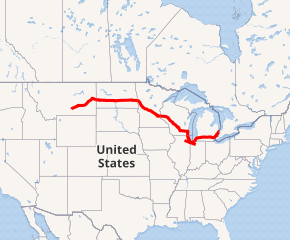

#  Abstract

In this project, we are going to analyse the dataset about the **westbound**(going towards west) traffic on the **I-94 Interstate Highway**.

The goal of our analysis is to determine a few **indicators** of heavy traffic on **I-94**. These indicators can be weather type, time of the day, time of the week, etc.


## Attribution 
Dataset by: John Hogue, john.d.hogue '@' live.com, Social Data Science & General Mills

Dataset can found at the [UCI machine learning repository](https://archive.ics.uci.edu/ml/datasets/Metro+Interstate+Traffic+Volume#). 

## Data Dictionary
 - `holiday` : **Categorical** -  US National holidays plus regional holiday, Minnesota State Fair

- `temp` : **Numeric** -  Average temp in kelvin

- `rain_1h` : **Numeric** - Amount in mm of rain that occurred in the hour

- `snow_1h` : **Numeric** - Amount in mm of snow that occurred in the hour

- `clouds_all` : **Numeric** - Percentage of cloud cover

- `weather_main` : **Categorical** - Short textual description of the current weather

- `weather_description` : **Categorical** - Longer textual description of the current weather

- `date_time` : **DateTime** - Hour of the data collected in local CST time

- `traffic_volume` **Numeric** - Hourly I-94 ATR 301 reported westbound traffic volume

# Initial Steps and Exploration

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#read the dataset
url = "https://raw.githubusercontent.com/Kathan-Vakharia/Indicators-of-Heavy-Traffic-on-I-94/main/Metro_Interstate_Traffic_Volume.csv"
i_94 = pd.read_csv(url)

In [3]:
#first five entries
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [4]:
#last five entries
i_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [5]:
#column info
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


There are $48204$ entries and no columns have **null** values.

Each row describes traffic and weather data for a specific **hour** — we have data from **2012-10-02 09:00:00** until **2018-09-30 23:00:00**

# Analyzing Traffic Volume

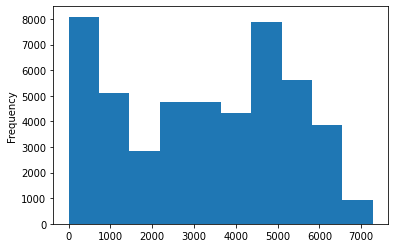

In [6]:
i_94["traffic_volume"].plot.hist()
plt.show()

In [7]:
i_94["traffic_volume"].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Between **2012-10-02 09:00:00** and **2018-09-30 23:00:00**, the hourly traffic volume varied from $0$ to $7,280$ cars, with an average of $3,260$ cars.

- About $25\%$ of the time, the `traffic_volume` was $1193$ or less.
- About $25\%$ of the time, the `traffic_volume` was more than $4933$(almost 4 times than above).

What could be the possible reason for this 🤔 May be **daytime** or **nighttime** has to do something with this?

Let's compare **daytime** and **nighttime** data, 

# Traffic Volume: Day Vs. Night

We'll start by dividing the dataset into **two** parts:

- Daytime data: hours from 7 a.m. to 7 p.m. (12 hours).
- Nighttime data: hours from 7 p.m. to 7 a.m. (12 hours).

While this is not a perfect way to distinguish day and night but it's a good starting point.

In [8]:
#converting date_time from "object" to "datetime"
i_94["date_time"] = pd.to_datetime(i_94["date_time"])

In [9]:
#isolating daytime and nighttime data
hours = i_94["date_time"].dt.hour
day = i_94[np.logical_and(hours >= 7, hours < 19)].copy()
night = i_94[np.logical_or(hours >= 19, hours < 7)].copy()
#copy() call is imp as we have to modify these dataframes later

In [10]:
print(f"Day Time Entries: {day.shape[0]}")
print(f"Night Time Entries: {night.shape[0]}")

Day Time Entries: 23877
Night Time Entries: 24327


There's a significant difference between entries of daytime and nightime. The reason might be because of some missing hourly data.


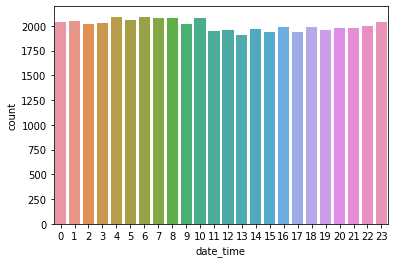

In [11]:
sns.countplot(x=i_94["date_time"].dt.hour)
plt.show()

And indeed we can see the bump in daytime hour counts!

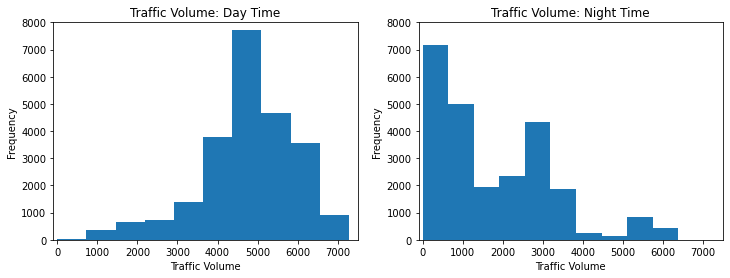

In [23]:
#plotting daytime and nightime traffic volumes
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(day["traffic_volume"])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title("Traffic Volume: Day Time")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")

plt.subplot(1, 2, 2)
plt.hist(night["traffic_volume"])
plt.xlim(-100, 7500)
plt.ylim(0, 8000)
plt.title("Traffic Volume: Night Time")
plt.xlabel("Traffic Volume")
plt.ylabel("Frequency")

plt.show()

In [13]:
day["traffic_volume"].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [14]:
night["traffic_volume"].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

According to Histogram,
- The distribution of `traffic_volume` at daytime is **left** skewed. This means that most of the traffic volume values are **high** — there are more than $4,252$ cars passing the station each hour $75\%$ of the time (because $25\%$of values are less or equal to 4,252).

- The distribution of `traffic_volume` at nighttime is **right** skewed. This means that most of the traffic volume values are **low** — $75\%$ of the time, the number of cars that passed the station each hour was less than or equal to $2,819$.

Although there are still measurements of over $5,000$ cars per hour, the traffic at night is generally **light**. Our goal is to find indicators of heavy traffic, so we'll only focus on the daytime data moving forward.

# Time Indicators - Month
One of the possible indicators of heavy traffic is time. There might be more people on the road in a certain month, on a certain day, or at a certain time of the day.

- First Let's see how traffic varies with **month**.

- For that we are going to plot a line graph of `traffic_volume` Vs. `avg_traffic_per_month`.

In [15]:
day["month"] = day["date_time"].dt.month
avg_traffic_per_month = day.groupby("month")["traffic_volume"].mean()
avg_traffic_per_month

month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

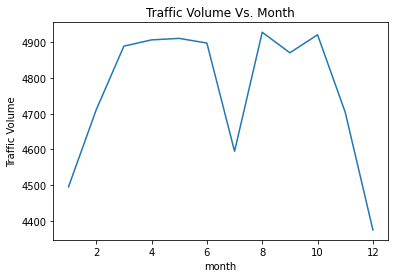

In [16]:
#line plot
avg_traffic_per_month.plot.line()
plt.ylabel("Traffic Volume")
plt.title("Traffic Volume Vs. Month")
plt.show()

The traffic looks less heavy during cold months (November–February) and more intense during warm months (March–October).

There is one interesting exception though, **JULY**. Why July but? is there anything special about it which caused the traffic to be less?

Let's  see `traffic_volume` of **July** every year to see if its a seasonal trend?

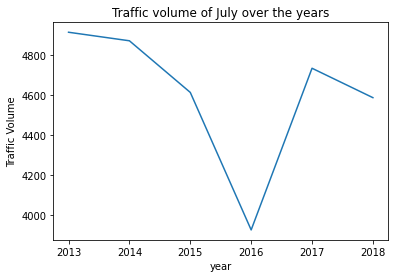

In [17]:
#create "year" column
day["year"] = day["date_time"].dt.year
#filter "july" month data
july_data = day[day["month"] == 7]
#group "july_data" by year can calculate average per year
# and plot the result
july_data.groupby(by="year")["traffic_volume"].mean().plot.line()
plt.title("Traffic volume of July over the years")
plt.ylabel("Traffic Volume")
plt.show()

So, seems like there was some sort of **construction** during July,2016 which might explain the the sudden drop of traffic_volume that year. [Ref](https://www.dot.nd.gov/dotnet/news/docs/2016releases/20160708-I-94Mapleton.pdf)

Otherwise, the traffic is generally very high during July as well.

As a tentative conclusion here, we can say that warm months generally show heavier traffic compared to cold months. In a warm month, you can can expect for each hour of daytime a traffic volume close to 5,000 cars

# Time Indicators - Day of the Week
Note: Monday, which is denoted by 0 and Sunday which is denoted by 6

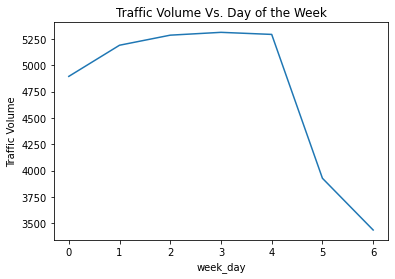

In [18]:
day["week_day"] = day["date_time"].dt.dayofweek
day.groupby("week_day")["traffic_volume"].mean().plot.line()
plt.ylabel("Traffic Volume")
plt.title("Traffic Volume Vs. Day of the Week")
plt.show()

- Traffic volume is significantly heavier on business days (Monday – Friday). Except for Monday, we only see values over $5,000$ during business days. 
- Traffic is lighter on weekends, with values below $4,000$ cars.

# Time Indicators - Time of the Day

We'll now generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately.

In [19]:
day["hour"] = day["date_time"].dt.hour
business_days = day[day["week_day"] <= 4] #4=>Friday
weekend = day[day["week_day"] >= 5] #5=>Saturday

#finding average traffic_volume per hour
by_hour_business = business_days.groupby("hour").mean()["traffic_volume"]
by_hour_weekend = weekend.groupby("hour").mean()["traffic_volume"]

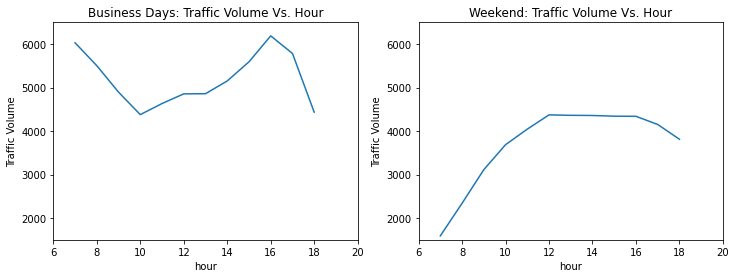

In [24]:
#Grid Chart 
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
by_hour_business.plot.line()
plt.title("Business Days: Traffic Volume Vs. Hour")
plt.ylabel("Traffic Volume")
plt.xlim(6,20)
plt.ylim(1500,6500)

plt.subplot(1, 2, 2)
by_hour_weekend.plot.line()
plt.title("Weekend: Traffic Volume Vs. Hour")
plt.ylabel("Traffic Volume")
plt.xlim(6,20)
plt.ylim(1500,6500)

plt.show()



At each hour of the day, the traffic volume is generally higher during business days compared to the weekends. As somehow expected, the rush hours are around 7 and 16 — when most people travel from home to work and back. We see volumes of over 6,000 cars at rush hours.

Also during weekends, volume is very less early mornings ( 7 — 10). This may be because people tend to wake up late on weekend mornings :)


## Time Indicators Summary

To summarize, we found a few time-related indicators of heavy traffic:

1. The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
2. The traffic is usually heavier on business days compared to weekends.
3. On business days, the rush hours are around 7 and 16.

# Weather Indicators
Another possible indicator of heavy traffic is **weather**. The dataset provides us with a few useful columns about weather:
1. **Numeric** -  `temp`, `rain_1h`, `snow_1h`, `clouds_all`
2. **Categorical** - `weather_main`, `weather_description`

A few of these columns are numerical so let's start by looking up their correlation values with traffic_volume.

In [30]:
numerical_weath_indicators = ["temp", "rain_1h", "snow_1h", "clouds_all"]
day.corr().loc["traffic_volume", numerical_weath_indicators]

temp          0.128317
rain_1h       0.003697
snow_1h       0.001265
clouds_all   -0.032932
Name: traffic_volume, dtype: float64

**Temperature** shows the strongest correlation with a value of just $+0.13$. 

The other relevant columns (`rain_1h`, `snow_1h`, `clouds_all`) don't show any strong correlation with `traffic_value`. 

Let's generate a scatter plot to visualize the correlation between `temp` and `traffic_volume`.

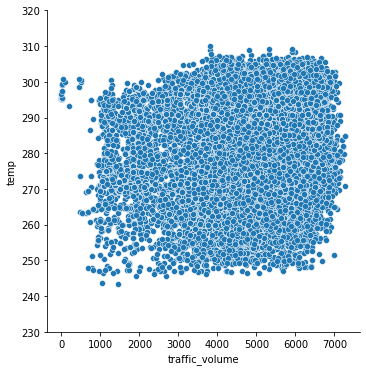

In [34]:
sns.relplot(data = day, x="traffic_volume",
            y="temp")
plt.ylim(230, 320) # two wrong 0 K temperatures mess up the y-axis
plt.show()

- We can conclude that temperature doesn't look like a solid indicator of heavy traffic.

Let's now look at the other weather-related columns: `weather_main` and `weather_description`. The idea is to calculate average `traffic_volume` for each category and then visualize them using a **bar plot**.

In [45]:
by_weather_main = day.groupby("weather_main")["traffic_volume"].mean().reset_index()
by_weather_main

,weather_main,traffic_volume
0,Clear,4778.416260
1,Clouds,4865.415996
2,Drizzle,4837.212911
3,Fog,4372.491713
4,Haze,4609.893285
5,Mist,4623.976475
6,Rain,4815.568462
7,Smoke,4564.583333
8,Snow,4396.321183
9,Squall,4211.000000


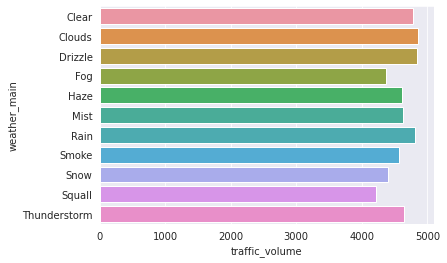

In [53]:
sns.set_style("darkgrid")
sns.barplot(data=by_weather_main, y="weather_main", x="traffic_volume")
plt.show()

It looks like there's no weather type where traffic volume exceeds $5,000$ cars. This makes finding a heavy traffic indicator more difficult. 

Let's also group by weather_description, which has a more granular weather classification.

In [46]:
by_weather_description = day.groupby("weather_description")["traffic_volume"].mean().reset_index()
by_weather_description

,weather_description,traffic_volume
0,SQUALLS,4211.000000
1,Sky is Clear,4919.009390
2,broken clouds,4824.130326
3,drizzle,4737.330935
4,few clouds,4839.818023
5,fog,4372.491713
6,freezing rain,4314.000000
7,haze,4609.893285
8,heavy intensity drizzle,4738.586207
9,heavy intensity rain,4610.356164


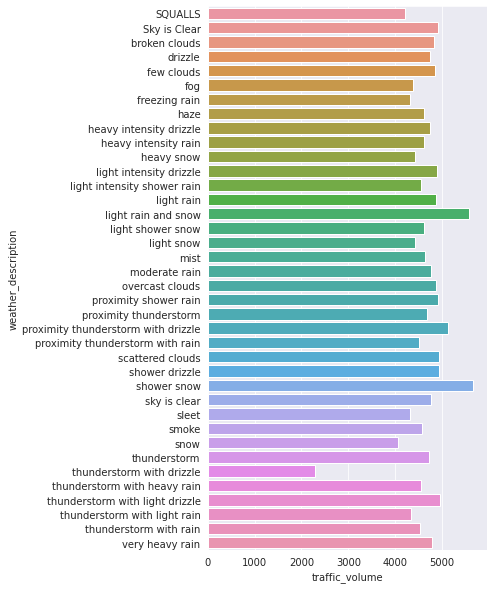

In [51]:
plt.figure(figsize=(5, 10))
sns.barplot(data=by_weather_description, y="weather_description", x="traffic_volume")
plt.show()


It looks like there are three weather types where traffic volume exceeds $5,000$:

1. Shower snow
2. Light rain and snow
3. Proximity thunderstorm with drizzle

It's not clear why these weather types have the highest average traffic values — this is bad weather, but not that bad. Perhaps more people take their cars out of the garage when the weather is bad instead of riding a bike or walking.

# Conclusion
In this project, we tried to find a few indicators of heavy traffic on the **I-94 Interstate highway**. We managed to find two types of indicators:

- Time indicators
    - The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).

    - The traffic is usually heavier on business days compared to the weekends.

    - On business days, the rush hours are around 7 and 16.

- Weather indicators
    - Shower snow
    - Light rain and snow
    - Proximity thunderstorm with drizzle

# References
1. https://stackoverflow.com/questions/20625582/how-to-deal-with-settingwithcopywarning-in-pandas